In [245]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [227]:
def parse_vtd_id(vtd):
    if len(vtd) <= 5:
        if vtd == "2023":
            print("Re-naming VTD 2023 -> WARD 18, PRECINCT 23")
            return f"WARD 18, PRECINCT 23"
        ward = str(int(vtd[:2]))
        if len(vtd[2:]) > 2:
            precinct = str(vtd[3:]) # turns "0502A" -> 5 2A
        else:
            precinct = str(int(vtd[2:]))
        return f"WARD {ward}, PRECINCT {precinct}"
    else:
        return vtd
    
def parse_boston_city_id(name):
    if "Boston City" in name:
        name = name.replace("City ", "")
    if "Boston" in name:
        name = name.replace("Boston ", "")
        name = name.upper()
    words = name.split(" ")
    words[1] = words[1] + ","
    name = " ".join(words)
    return name

In [194]:
%%time
gdf = gpd.read_file("../One-Click-Chains/shapes/MA_vtd20/")
df = pd.read_csv("tabular/BOS-mayoral-primary-prelim-results.csv", skiprows=range(1,5))
gdf["Precinct"] = gdf.NAME20.apply(parse_vtd_id)

renames = {
    "ANNISSA ESSAIBI GEORGE": "BMAY21PAG",
#     "RICHARD A SPAGNUOLO": "BMAY21PRS", # < 5%
    "ANDREA JOY CAMPBELL": "BMAY21PAC",
    "KIM M JANEY": "BMAY21PKJ",
    "MICHELLE WU": "BMAY21PMW",
#     "JON SANTIAGO": "BMAY21PJS", # < 5%
#     "ROBERT CAPPUCCI": "BMAY21PRC", # < 5%
#     "JOHN F BARROS": "BMAY21PJB", # < 5%
}
candidates = list(renames.values())
df.rename(columns=renames, inplace=True)

Re-naming VTD 2023 -> WARD 18, PRECINCT 23
CPU times: user 572 ms, sys: 27.4 ms, total: 599 ms
Wall time: 611 ms


In [195]:
gdf = gdf.merge(df[candidates + ["Precinct"]], on='Precinct', how='outer')

In [197]:
assert gdf[candidates].sum().sum() == df[candidates].sum().sum()

In [202]:
gdf.to_file("shapes/MA_vtd20")

In [291]:
gdf

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,...,SEN20PEMAR,SEN20PJKEN,SEN20GEMAR,SEN20GKOCO,geometry,Precinct,BMAY21PAG,BMAY21PAC,BMAY21PKJ,BMAY21PMW
0,25,013,000023,25013000023,A,Agawam Town Precinct 4,Agawam Town Precinct 4,00,G5240,N,...,201.0,307.0,811.0,817.0,"POLYGON ((348958.573 2851699.015, 349011.670 2...",Agawam Town Precinct 4,NaN,NaN,NaN,NaN
1,25,013,000021,25013000021,A,Agawam Town Precinct 2,Agawam Town Precinct 2,00,G5240,N,...,282.0,369.0,979.0,1116.0,"POLYGON ((328792.107 2856781.949, 328891.063 2...",Agawam Town Precinct 2,NaN,NaN,NaN,NaN
2,25,013,000027,25013000027,A,Agawam Town Precinct 8,Agawam Town Precinct 8,00,G5240,N,...,285.0,437.0,1039.0,1036.0,"POLYGON ((347293.769 2839460.409, 347300.224 2...",Agawam Town Precinct 8,NaN,NaN,NaN,NaN
3,25,013,000022,25013000022,A,Agawam Town Precinct 3,Agawam Town Precinct 3,00,G5240,N,...,252.0,380.0,995.0,1001.0,"POLYGON ((339754.497 2850589.317, 339879.397 2...",Agawam Town Precinct 3,NaN,NaN,NaN,NaN
4,25,013,000026,25013000026,A,Agawam Town Precinct 7,Agawam Town Precinct 7,00,G5240,N,...,247.0,360.0,886.0,1046.0,"POLYGON ((326237.619 2840824.315, 326325.454 2...",Agawam Town Precinct 7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,25,027,001984,25027001984,A,Westborough Town Precinct 2,Westborough Town Precinct 2,00,G5240,N,...,334.0,221.0,1155.0,489.0,"POLYGON ((626718.095 2925844.694, 626766.130 2...",Westborough Town Precinct 2,NaN,NaN,NaN,NaN
2153,25,027,001955,25027001955,A,Webster Town Precinct 5,Webster Town Precinct 5,00,G5240,N,...,162.0,289.0,944.0,844.0,"POLYGON ((550398.058 2838300.534, 550411.452 2...",Webster Town Precinct 5,NaN,NaN,NaN,NaN
2154,25,027,001953,25027001953,A,Webster Town Precinct 3,Webster Town Precinct 3,00,G5240,N,...,125.0,258.0,752.0,718.0,"POLYGON ((552334.217 2846790.865, 552366.407 2...",Webster Town Precinct 3,NaN,NaN,NaN,NaN
2155,25,027,001986,25027001986,A,Westborough Town Precinct 4,Westborough Town Precinct 4,00,G5240,N,...,657.0,407.0,1860.0,836.0,"POLYGON ((608399.593 2917696.700, 609174.217 2...",Westborough Town Precinct 4,NaN,NaN,NaN,NaN


In [215]:
df

,Precinct,BMAY21PAG,RICHARD A SPAGNUOLO,BMAY21PAC,BMAY21PKJ,BMAY21PMW,JON SANTIAGO,ROBERT CAPPUCCI,JOHN F BARROS,Total Votes,Unresolved Write-In
0,"WARD 1, PRECINCT 1",85.0,4.0,92.0,49.0,152.0,0.0,10.0,11.0,403.0,0.0
1,"WARD 1, PRECINCT 10",32.0,2.0,21.0,29.0,60.0,0.0,9.0,3.0,156.0,0.0
2,"WARD 1, PRECINCT 11",170.0,1.0,21.0,48.0,130.0,0.0,19.0,6.0,396.0,1.0
3,"WARD 1, PRECINCT 12",208.0,1.0,38.0,38.0,103.0,2.0,15.0,5.0,411.0,1.0
4,"WARD 1, PRECINCT 13",182.0,1.0,46.0,63.0,160.0,1.0,13.0,4.0,470.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
250,"WARD 9, PRECINCT 1",47.0,2.0,82.0,123.0,188.0,6.0,1.0,13.0,462.0,0.0
251,"WARD 9, PRECINCT 2",63.0,0.0,203.0,83.0,191.0,6.0,1.0,10.0,557.0,0.0
252,"WARD 9, PRECINCT 3",36.0,0.0,105.0,238.0,182.0,5.0,2.0,14.0,583.0,1.0
253,"WARD 9, PRECINCT 4",12.0,2.0,48.0,149.0,106.0,6.0,1.0,6.0,330.0,0.0


In [283]:
df16 = deepcopy(df)
df16.Precinct.iloc[216] = "WARD 5, PRECINCT 2"
df16["index"] = df16.index
df16 = df16.groupby(["Precinct"]).agg('sum')
df16["Precinct"] = df16.index
df16 = df16.set_index("index")

/Users/gabe/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [284]:
gdf16 = gpd.read_file("../Ensemble-Analysis/shapes/ma_prec_12_16/")
gdf16["Precinct"] = gdf16.NAME.apply(parse_boston_city_id)
gdf16 = gdf16.merge(df16[candidates + ["Precinct"]], on='Precinct', how='outer')

In [287]:
gdf16[candidates].sum().sum()

102241.0

In [288]:
df16[candidates].sum().sum()

102241.0

In [289]:
df16[candidates].sum().sum()

102241.0

In [290]:
gdf16.to_file("shapes/MA_prec_12_16")

<AxesSubplot:>

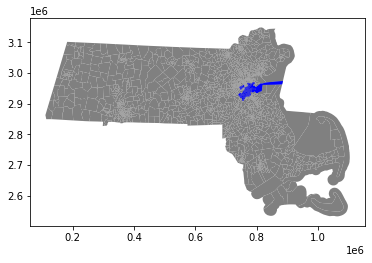

In [44]:
_, ax = plt.subplots()

gdf.plot(ax=ax,
        color='grey')
gdf[gdf.NAME20.apply(lambda x: " " not in x)].plot(ax=ax,
                                                  color='blue')